In [73]:
import pandas as pd
from pandas import Series, DataFrame

In [36]:
text=input('enter a string of integers and words').strip()
s = Series(text.split())

enter a string of integers and words10 5 325 word 2 panda


In [38]:
s.loc[~s.str.isdigit()].str.len().mean()

4.5

In [46]:
(
    s                        # start with series of words
    .loc[s.str.isdigit()]    # keep only digit words
    .astype(int)             # get a series of ints
    .mean()
)

85.5

In [47]:
max_word_length = (
    s                        # start with series of words
    .loc[~s.str.isdigit()]   # keep only non-digit words
    .str.len()               # get length of each word
    .max()                  # calculate mean on the series of lengths
)

s.loc[s.str.len() == max_word_length]

5    panda
dtype: object

In [74]:
df = pd.read_csv('taxi.csv',
                 parse_dates=['tpep_pickup_datetime',
                             'tpep_dropoff_datetime'])
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                   int64
trip_distance                   float64
pickup_longitude                float64
pickup_latitude                 float64
RateCodeID                        int64
store_and_fwd_flag               object
dropoff_longitude               float64
dropoff_latitude                float64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
dtype: object

In [80]:
df.loc[df['tpep_pickup_datetime'].dt.hour<12, 'total_amount'].mean()

17.420879297732263

In [81]:
df.loc[df['tpep_pickup_datetime'].dt.day_of_week==1, 'trip_distance'].mean()

2.6611988171064604

In [84]:
df['trip_time']=df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']

In [110]:
df.loc[df['trip_time']==df['trip_time'].min() , 'total_amount'].mean()

13.187692307692313

In [113]:
df.loc[df['trip_time']==df['trip_time'].max() , 'total_amount'].mean()

11.16

In [116]:
df.loc[df['trip_time']>'4 hours','total_amount'].mean()

47.14

In [117]:
df.loc[df['trip_time']< '1 minute','total_amount'].mean()

31.93892857142858

In [128]:
filename='../data/winemag-150k-reviews.csv'
df = pd.read_csv(filename)
df.head()
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 105.8 MB


In [129]:
for one_column in ['country', 'description', 'designation', 'province',
                   'region_1', 'region_2', 'variety', 'winery']:
    df[one_column] = df[one_column].astype('category')
df.info(memory_usage='deep')    


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   Unnamed: 0   150930 non-null  int64   
 1   country      150925 non-null  category
 2   description  150930 non-null  category
 3   designation  105195 non-null  category
 4   points       150930 non-null  int64   
 5   price        137235 non-null  float64 
 6   province     150925 non-null  category
 7   region_1     125870 non-null  category
 8   region_2     60953 non-null   category
 9   variety      150930 non-null  category
 10  winery       150930 non-null  category
dtypes: category(8), float64(1), int64(2)
memory usage: 45.8 MB


In [131]:
df = pd.read_csv('taxi.csv')
df.info(memory_usage='deep')
df.groupby('passenger_count')['total_amount'].mean()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   VendorID               9999 non-null   int64  
 1   tpep_pickup_datetime   9999 non-null   object 
 2   tpep_dropoff_datetime  9999 non-null   object 
 3   passenger_count        9999 non-null   int64  
 4   trip_distance          9999 non-null   float64
 5   pickup_longitude       9999 non-null   float64
 6   pickup_latitude        9999 non-null   float64
 7   RateCodeID             9999 non-null   int64  
 8   store_and_fwd_flag     9999 non-null   object 
 9   dropoff_longitude      9999 non-null   float64
 10  dropoff_latitude       9999 non-null   float64
 11  payment_type           9999 non-null   int64  
 12  fare_amount            9999 non-null   float64
 13  extra                  9999 non-null   float64
 14  mta_tax                9999 non-null   float64
 15  tip_

passenger_count
0    25.570000
1    17.368569
2    18.406306
3    17.994704
4    18.881648
5    17.211269
6    17.401355
Name: total_amount, dtype: float64

In [141]:
df['tip_percentage']=df['tip_amount']/df['total_amount']
df.groupby('passenger_count')['tip_percentage'].mean().sort_values()

passenger_count
4    0.077067
6    0.086075
3    0.087368
2    0.088309
1    0.092880
5    0.094349
0    0.183127
Name: tip_percentage, dtype: float64

In [142]:
df.groupby('VendorID')['tip_percentage'].mean()

VendorID
1    0.091538
2    0.091680
Name: tip_percentage, dtype: float64

In [145]:
df = pd.read_csv('taxi.csv',
                 parse_dates=['tpep_pickup_datetime',
                             'tpep_dropoff_datetime'])
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RateCodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,2015-06-02 11:19:29,2015-06-02 11:47:52,1,1.63,-73.954430,40.764141,1,N,-73.974754,40.754093,2,17.0,0.0,0.5,0.00,0.0,0.3,17.80
1,2,2015-06-02 11:19:30,2015-06-02 11:27:56,1,0.46,-73.971443,40.758942,1,N,-73.978539,40.761909,1,6.5,0.0,0.5,1.00,0.0,0.3,8.30
2,2,2015-06-02 11:19:31,2015-06-02 11:30:30,1,0.87,-73.978111,40.738434,1,N,-73.990273,40.745438,1,8.0,0.0,0.5,2.20,0.0,0.3,11.00
3,2,2015-06-02 11:19:31,2015-06-02 11:39:02,1,2.13,-73.945892,40.773529,1,N,-73.971527,40.760330,1,13.5,0.0,0.5,2.86,0.0,0.3,17.16
4,1,2015-06-02 11:19:32,2015-06-02 11:32:49,1,1.40,-73.979088,40.776772,1,N,-73.982162,40.758999,2,9.5,0.0,0.5,0.00,0.0,0.3,10.30


<Axes: ylabel='Frequency'>

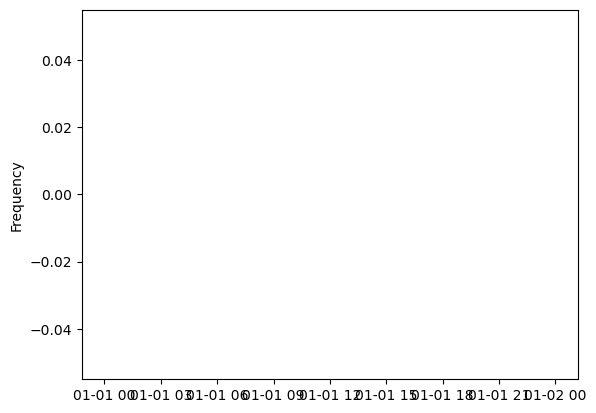

In [149]:
df['tpep_pickup_datetime'].plot.hist(bins=40)